In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import FunctionTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE


from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


import joblib

import warnings

warnings.filterwarnings("ignore")

In [3]:
high_popularity_df = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\high_popularity_spotify_data.csv')
low_popularity_df = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\low_popularity_spotify_data.csv')

df = pd.concat([high_popularity_df, low_popularity_df], ignore_index=True)

In [4]:
columns_to_drop = ['time_signature', 'track_href', 'uri', 'analysis_url', 'type']
experiment_df = df.drop(columns=columns_to_drop)
experiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4831 entries, 0 to 4830
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   energy                    4830 non-null   float64
 1   tempo                     4830 non-null   float64
 2   danceability              4830 non-null   float64
 3   playlist_genre            4831 non-null   object 
 4   loudness                  4830 non-null   float64
 5   liveness                  4830 non-null   float64
 6   valence                   4830 non-null   float64
 7   track_artist              4831 non-null   object 
 8   speechiness               4830 non-null   float64
 9   track_popularity          4831 non-null   int64  
 10  track_album_name          4830 non-null   object 
 11  playlist_name             4831 non-null   object 
 12  track_id                  4831 non-null   object 
 13  track_name                4831 non-null   object 
 14  track_al

In [5]:
experiment_df.sample(5, random_state=42)

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,speechiness,track_popularity,...,track_album_release_date,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,playlist_id
746,0.5860,189.978,0.3260,latin,-7.966,0.0787,0.2950,HUMBE,0.0605,71,...,2021-11-11,0.0000,2Yjubr5GHX41ht808oZPzs,1.0,6.0,262309.0,0.531,0v9UztY5A12cJUsWD7PZzS,chill,0jqQDMmHIkdbkFQdQTlMEQ
1550,0.5500,124.130,0.6290,hip-hop,-6.772,0.0950,0.1540,Lil Uzi Vert,0.0543,68,...,2024-11-01,0.0000,7awBKnBq0qRLNyD5lI47R0,1.0,0.0,189487.0,0.152,1gUUuh7FQ3mr7nEq0SRvGX,melodic,37i9dQZF1EIgLJJI0PCAq9
4529,0.0525,66.754,0.0658,electronic,-26.699,0.1150,0.0389,Christopher Galovan,0.0367,37,...,2024-05-10,0.8300,2e84itcJJkAQ2jYX9e0TVe,1.0,0.0,145267.0,0.925,3EzLqzSVxa4Bf1FI7UiCdJ,nordic,54uNB5xGn23ZxdXR1wu84J
3749,0.0768,123.193,0.1870,classical,-23.199,0.0911,0.0387,"Ēriks Ešenvalds, The Pacific Lutheran Choir Of...",0.0441,29,...,2020-01-17,0.0475,1o4x46Hv82vcBRuVZeMe4n,1.0,8.0,235467.0,0.980,5KCHfR2RGdpieZoQ5NQd5g,choral,37i9dQZF1DX9WxEZbyU6MA
3848,0.5240,81.999,0.5790,gospel,-7.764,0.1100,0.7870,Anendlessocean,0.0584,52,...,2023-12-01,0.0000,6WRCBHNfy0szRdmgrWbsv6,1.0,10.0,275000.0,0.296,0D9JNf7ntudlGuRUQW1bXp,modern,4reKL9y3Zh2ccRcBKfAwuz


In [6]:
experiment_df.describe().T

,count,mean,std,min,25%,50%,75%,max
energy,4830.0,0.586691,0.246263,0.000202,0.442250,0.633000,0.77700,0.998
tempo,4830.0,118.269293,28.512615,48.232000,96.063000,118.059500,136.72350,241.426
danceability,4830.0,0.622311,0.187706,0.058900,0.525000,0.653000,0.75800,0.979
loudness,4830.0,-9.281627,7.129396,-48.069000,-10.297750,-7.191000,-5.33675,1.318
liveness,4830.0,0.167613,0.124429,0.021000,0.095400,0.118000,0.19500,0.979
valence,4830.0,0.481930,0.258036,0.029600,0.275000,0.483000,0.69000,0.987
speechiness,4830.0,0.101738,0.101032,0.021900,0.038600,0.056100,0.11800,0.927
track_popularity,4831.0,54.761126,19.828573,11.000000,41.000000,56.000000,72.00000,100.000
instrumentalness,4830.0,0.201053,0.351918,0.000000,0.000000,0.000091,0.20050,0.991
mode,4830.0,0.562112,0.496178,0.000000,0.000000,1.000000,1.00000,1.000


In [7]:
duplicates =  experiment_df[experiment_df.duplicated(subset=['id'])]
duplicates = duplicates.shape[0]

print(f"Number of duplicate tracks: {duplicates}")

Number of duplicate tracks: 336


In [8]:
experiment_df = experiment_df.drop_duplicates(subset=['id'])

print(f"After removing duplicates, we have {experiment_df.shape[0]} songs left.")

After removing duplicates, we have 4495 songs left.


In [9]:
experiment_df.isnull().sum()

energy                      1
tempo                       1
danceability                1
playlist_genre              0
loudness                    1
liveness                    1
valence                     1
track_artist                0
speechiness                 1
track_popularity            0
track_album_name            1
playlist_name               0
track_id                    0
track_name                  0
track_album_release_date    0
instrumentalness            1
track_album_id              0
mode                        1
key                         1
duration_ms                 1
acousticness                1
id                          1
playlist_subgenre           0
playlist_id                 0
dtype: int64

In [10]:
experiment_df = experiment_df.dropna()
experiment_df.isnull().sum()

energy                      0
tempo                       0
danceability                0
playlist_genre              0
loudness                    0
liveness                    0
valence                     0
track_artist                0
speechiness                 0
track_popularity            0
track_album_name            0
playlist_name               0
track_id                    0
track_name                  0
track_album_release_date    0
instrumentalness            0
track_album_id              0
mode                        0
key                         0
duration_ms                 0
acousticness                0
id                          0
playlist_subgenre           0
playlist_id                 0
dtype: int64

In [11]:
def convert_to_datetime(df):
    df = df.copy()
    df['track_album_release_date'] = pd.to_datetime(df['track_album_release_date'], errors='coerce')
    return df

def extract_year_and_month(df):
    df = df.copy()
    df['track_album_release_year'] = df['track_album_release_date'].dt.year
    df['track_album_release_month'] = df['track_album_release_date'].dt.month
    return df


def classify_seasons(df):
    df = df.copy()

    def seasons_classification(month):
        if month in [12, 1, 2]:
            return 'Winter'
        elif month in [3, 4, 5]:
            return 'Spring'
        elif month in [6, 7, 8]:
            return 'Summer'
        else:
            return 'Fall'

    df['track_album_release_season'] = df['track_album_release_month'].apply(seasons_classification)
    return df


date_pipeline = Pipeline([
    ('to_datetime', FunctionTransformer(convert_to_datetime)),
    ('extract_year_month', FunctionTransformer(extract_year_and_month)),
    ('classify_seasons', FunctionTransformer(classify_seasons)),
])

In [12]:
def encode_playlist_genre(df):
    df = df.copy()
    playlist_genre_label_encoder = LabelEncoder()
    df['playlist_genre_encoded'] = playlist_genre_label_encoder.fit_transform(df['playlist_genre'])

    # print("Playlist Genre Label Mapping:")
    # for label, encoded_label in zip(playlist_genre_label_encoder.classes_, range(len(playlist_genre_label_encoder.classes_))):
    #     print(f"{label}: {encoded_label}")

    return df


def encode_playlist_subgenre(df):
    df = df.copy()
    playlist_subgenre_label_encoder = LabelEncoder()
    df['playlist_subgenre_encoded'] = playlist_subgenre_label_encoder.fit_transform(df['playlist_subgenre'])

    # print("Playlist Genre Label Mapping:")
    # for label, encoded_label in zip(playlist_subgenre_label_encoder.classes_, range(len(playlist_subgenre_label_encoder.classes_))):
    #     print(f"{label}: {encoded_label}")

    return df


def encode_album_release_season(df):
    df = df.copy()
    track_album_release_season_label_encoder = LabelEncoder()
    df['track_album_release_season_encoded'] = track_album_release_season_label_encoder.fit_transform(df['track_album_release_season'])

    # print("Playlist Genre Label Mapping:")
    # for label, encoded_label in zip(track_album_release_season_label_encoder.classes_, range(len(track_album_release_season_label_encoder.classes_))):
    #     print(f"{label}: {encoded_label}")

    return df


encoding_pipeline = Pipeline([
    ('encode_playlist_genre', FunctionTransformer(encode_playlist_genre)),
    ('encode_playlist_subgenre', FunctionTransformer(encode_playlist_subgenre)),
    ('encode_album_release_season', FunctionTransformer(encode_album_release_season)),
])

In [13]:
experiment_df = date_pipeline.fit_transform(experiment_df)
experiment_df = encoding_pipeline.fit_transform(experiment_df)
experiment_df = experiment_df.dropna()
experiment_df.head()

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,speechiness,track_popularity,...,acousticness,id,playlist_subgenre,playlist_id,track_album_release_year,track_album_release_month,track_album_release_season,playlist_genre_encoded,playlist_subgenre_encoded,track_album_release_season_encoded
0,0.592,157.969,0.521,pop,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",0.0304,100,...,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,37i9dQZF1DXcBWIGoYBM5M,2024.0,8.0,Summer,25,55,2
1,0.507,104.978,0.747,pop,-10.171,0.117,0.438,Billie Eilish,0.0358,97,...,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,37i9dQZF1DXcBWIGoYBM5M,2024.0,5.0,Spring,25,55,1
2,0.808,108.548,0.554,pop,-4.169,0.159,0.372,Gracie Abrams,0.0368,93,...,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,37i9dQZF1DXcBWIGoYBM5M,2024.0,10.0,Fall,25,55,0
3,0.910,112.966,0.670,pop,-4.070,0.304,0.786,Sabrina Carpenter,0.0634,81,...,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,37i9dQZF1DXcBWIGoYBM5M,2024.0,8.0,Summer,25,55,2
4,0.783,149.027,0.777,pop,-4.477,0.355,0.939,"ROSÉ, Bruno Mars",0.2600,98,...,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,37i9dQZF1DXcBWIGoYBM5M,2024.0,10.0,Fall,25,55,0


In [14]:
experiment_df.isnull().sum()

energy                                0
tempo                                 0
danceability                          0
playlist_genre                        0
loudness                              0
liveness                              0
valence                               0
track_artist                          0
speechiness                           0
track_popularity                      0
track_album_name                      0
playlist_name                         0
track_id                              0
track_name                            0
track_album_release_date              0
instrumentalness                      0
track_album_id                        0
mode                                  0
key                                   0
duration_ms                           0
acousticness                          0
id                                    0
playlist_subgenre                     0
playlist_id                           0
track_album_release_year              0


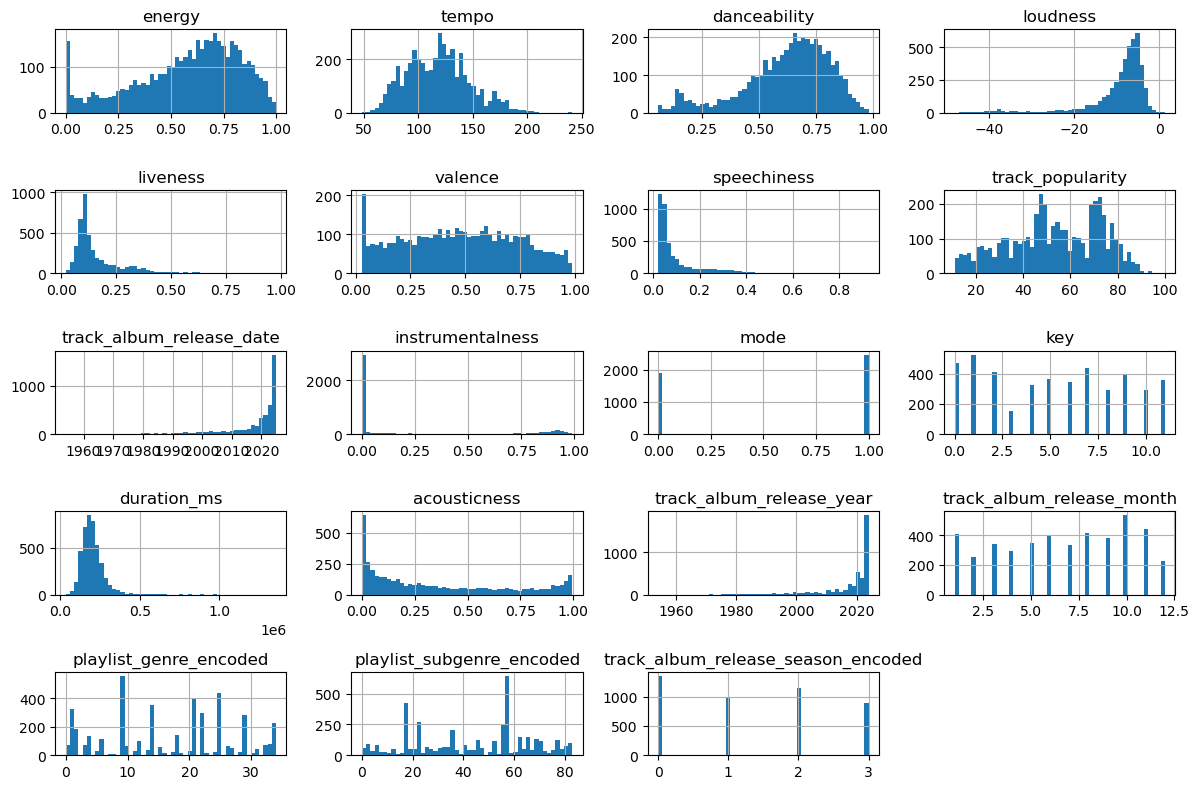

In [15]:
experiment_df.hist(bins = 50, figsize=(12,8))
plt.tight_layout()
plt.show()

<Axes: ylabel='count'>

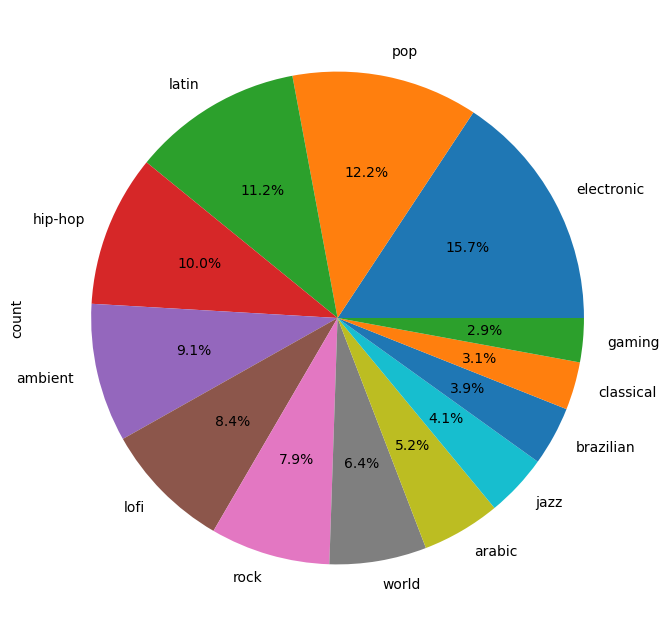

In [16]:
genre_counts = experiment_df.playlist_genre.value_counts()
genre_counts_top_10 = genre_counts.nlargest(13)

plt.figure(figsize=(10, 8))
genre_counts_top_10.plot.pie(autopct='%1.1f%%')

In [17]:
genre_popularity = experiment_df.groupby('playlist_genre')['track_popularity'].mean()
genre_popularity_top_10 = genre_popularity.nlargest(10)

print("Average popularity of each genre:")
print(genre_popularity_top_10.sort_values(ascending=False))

Average popularity of each genre:
playlist_genre
r&b        76.437500
gaming     69.401961
k-pop      68.500000
metal      66.653846
punk       66.246154
rock       65.169065
j-pop      64.956522
hip-hop    62.019886
pop        61.960648
korean     61.687500
Name: track_popularity, dtype: float64


([<matplotlib.axis.XTick at 0x21323e86540>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90')])

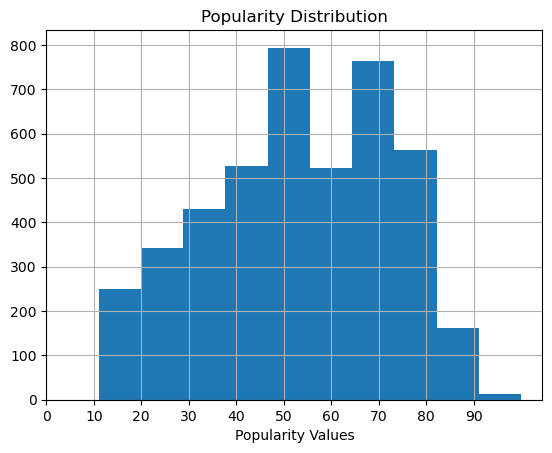

In [18]:
experiment_df.track_popularity.hist()
plt.title('Popularity Distribution')

plt.xlabel('Popularity Values')

plt.xticks(range(0, 100, 10))

<Axes: >

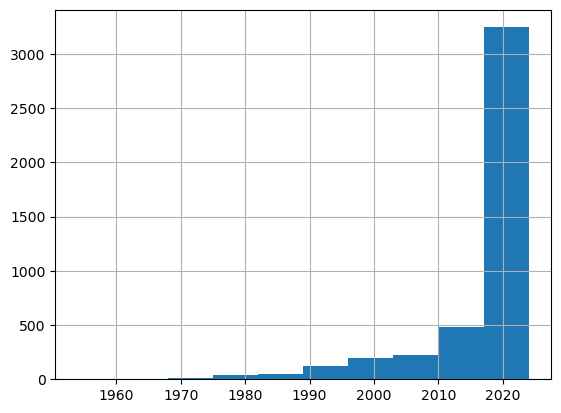

In [19]:
experiment_df.track_album_release_year.hist()

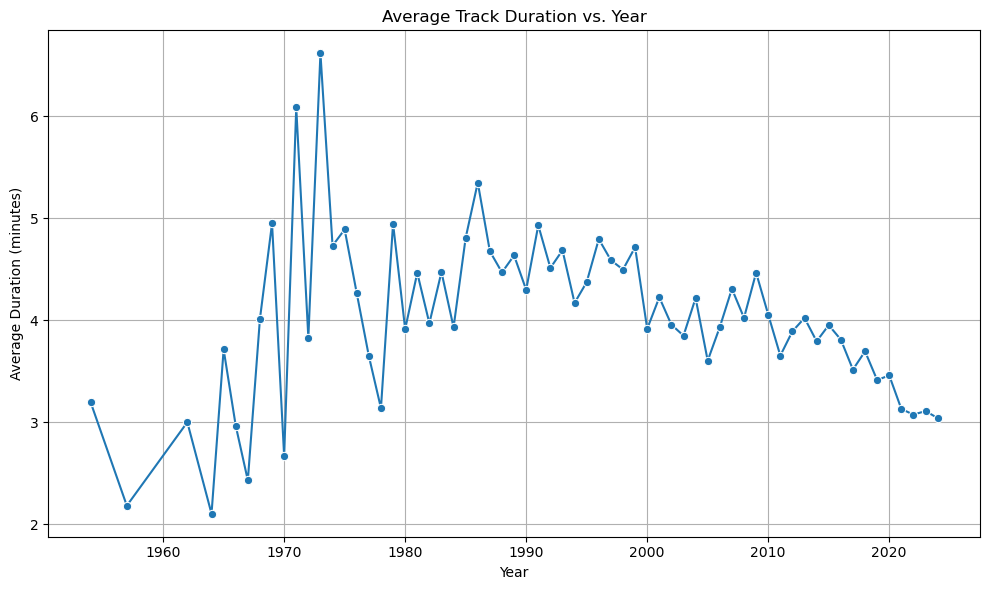

In [20]:
yearly_avg_duration = experiment_df.groupby('track_album_release_year')['duration_ms'].mean().reset_index()

yearly_avg_duration['track_duration_min'] = yearly_avg_duration['duration_ms'] / 60000

plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_avg_duration, x='track_album_release_year', y='track_duration_min', marker='o')

plt.title('Average Track Duration vs. Year')
plt.xlabel('Year')
plt.ylabel('Average Duration (minutes)')
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: >

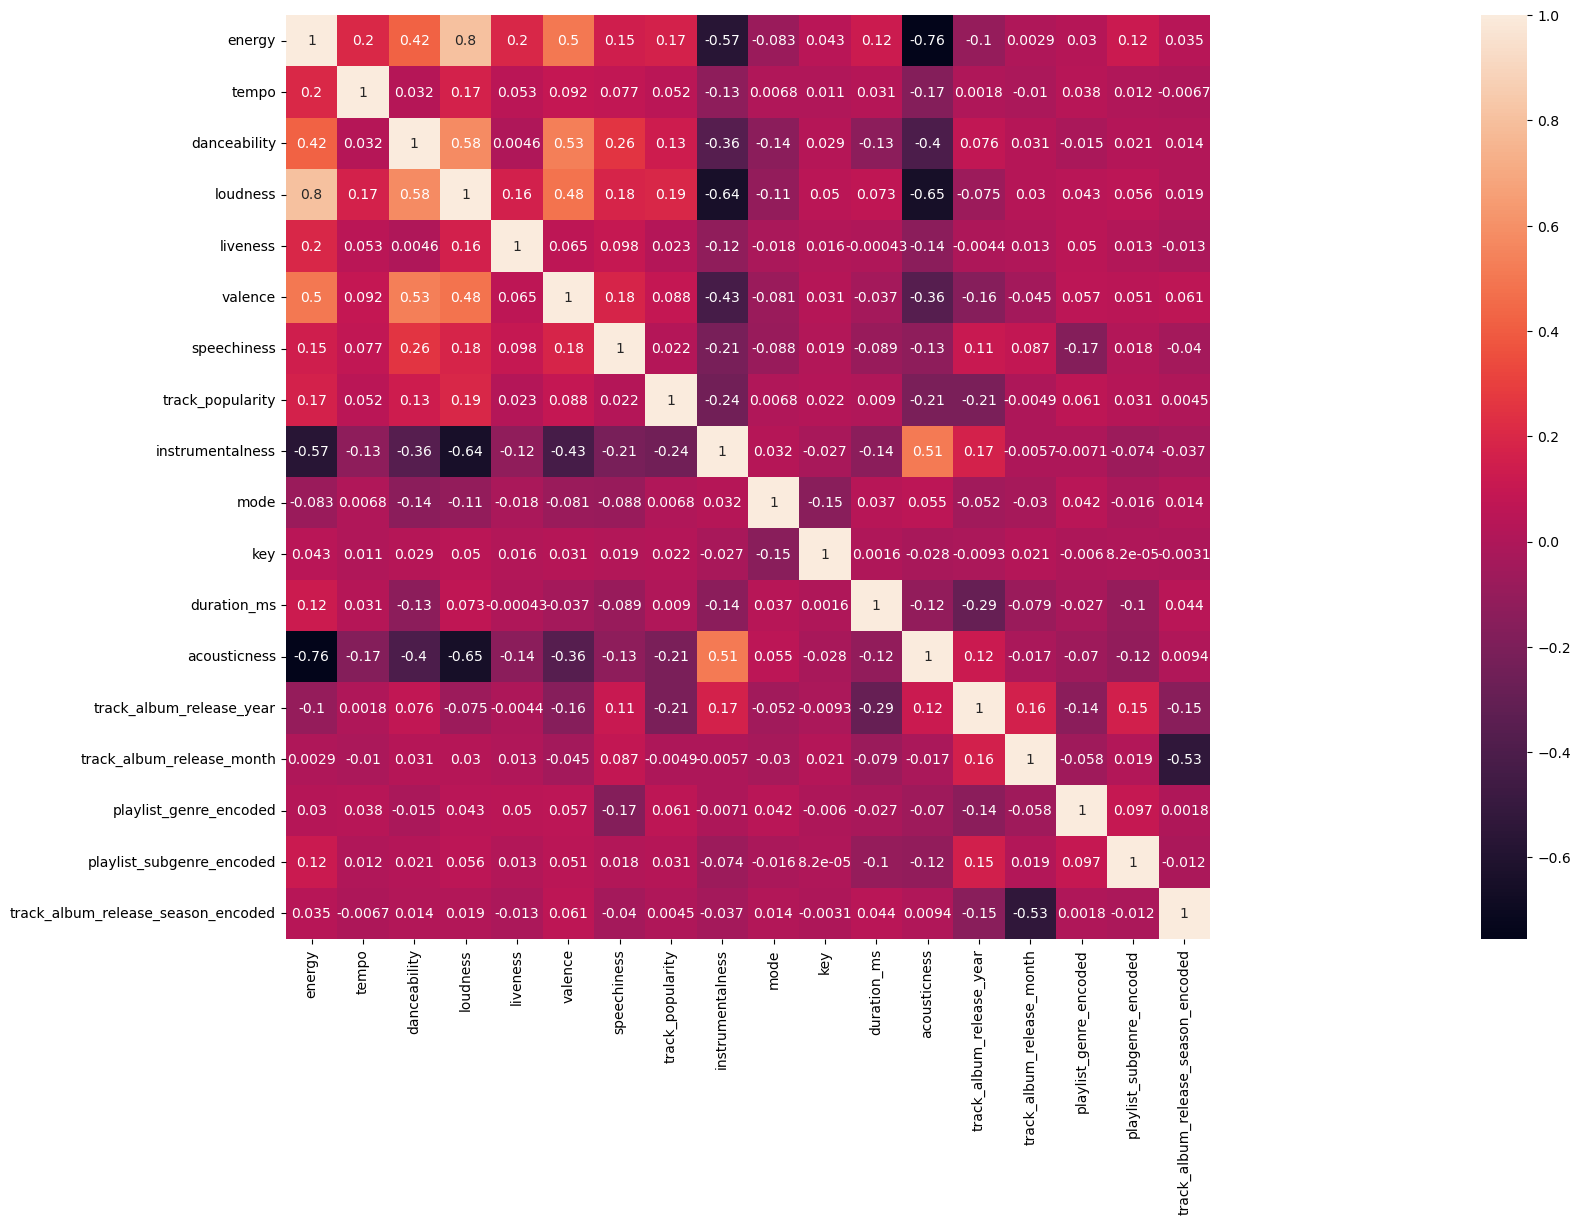

In [21]:
corr = experiment_df.corr(numeric_only=True)

fig, ax = plt.subplots(figsize = (16,12))
fig.set_size_inches(70,12)
sns.heatmap(corr,square=True, annot=True)

In [22]:
# Create a new column to label songs as "hit" (1) or "non-hit" (0)
experiment_df['track_popularity_cat'] = (experiment_df['track_popularity'] > 68).astype(int)

experiment_df[['track_popularity', 'track_popularity_cat']].sample(5)

,track_popularity,track_popularity_cat
286,82,1
4704,37,0
340,73,1
779,78,1
4417,66,0


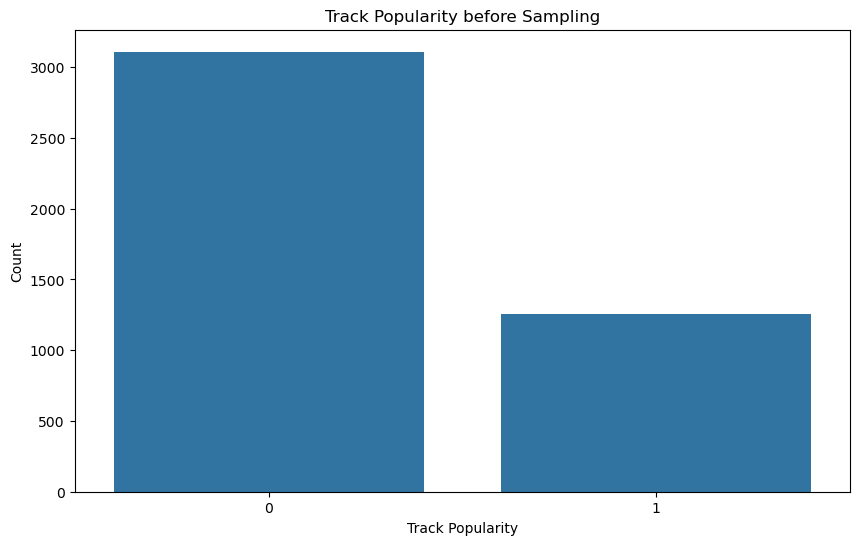

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(data=experiment_df, x='track_popularity_cat')
plt.title('Track Popularity before Sampling')
plt.xlabel('Track Popularity')
plt.ylabel('Count')
plt.show()

In [24]:
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','playlist_subgenre_encoded', 'playlist_genre_encoded', 'track_album_release_season_encoded', 'track_album_release_month']

X = experiment_df[features]
y = experiment_df['track_popularity_cat']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=experiment_df['track_popularity_cat'])

smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f'Original dataset shape: {X.shape}')

print(f'Resampled dataset shape: {X_train_smote.shape}')

Original dataset shape: (4368, 15)
Resampled dataset shape: (4974, 15)


In [25]:
from collections import Counter

print('Original dataset shape:', Counter(y))

print('Resampled dataset shape:', Counter(y_train_smote))

Original dataset shape: Counter({0: 3109, 1: 1259})
Resampled dataset shape: Counter({0: 2487, 1: 2487})


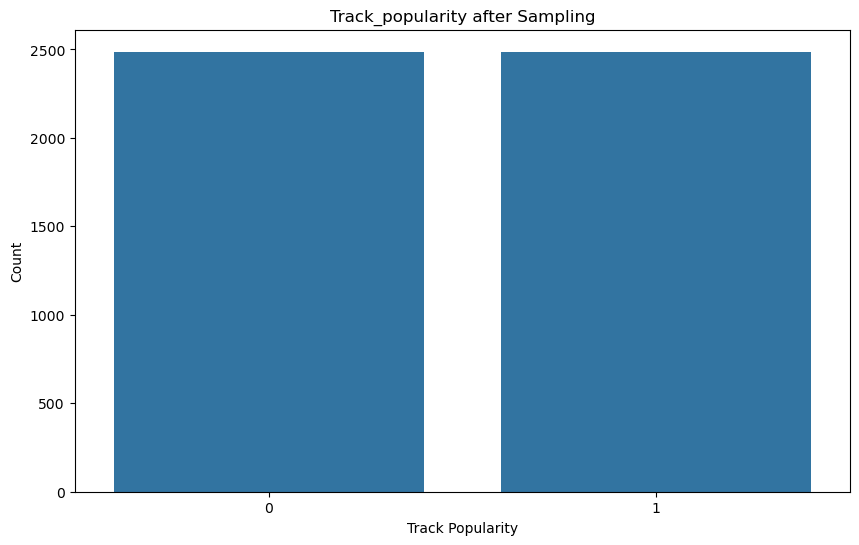

In [26]:
y_train_smote_df = pd.DataFrame({'track_popularity_cat': y_train_smote})

plt.figure(figsize=(10, 6))
sns.countplot(data=y_train_smote_df, x='track_popularity_cat')
plt.title('Track_popularity after Sampling')
plt.xlabel('Track Popularity')
plt.ylabel('Count')
plt.show()

In [27]:
# Define the models
model_dict = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boost': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Extra Tree': ExtraTreesClassifier(),
    'XGBoost': XGBClassifier(),          
    'LightGBM': LGBMClassifier(),      
    'DummyClassifier': DummyClassifier(strategy='most_frequent' ,random_state=42)
}

In [28]:
def fit_and_score (models, x_train, x_test, y_train, y_test):
    
    np.random.seed(42)
    model_accuracy = {}
    
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_accuracy[name] = model.score(x_test, y_test)
        
    return model_accuracy

In [29]:
model_accuracy = fit_and_score(model_dict, X_train_smote, X_test,y_train_smote, y_test)
model_accuracy

[LightGBM] [Info] Number of positive: 2487, number of negative: 2487
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001359 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3425
[LightGBM] [Info] Number of data points in the train set: 4974, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


{'Logistic Regression': 0.6384439359267735,
 'KNN': 0.6762013729977117,
 'Random Forest': 0.8295194508009154,
 'Gradient Boost': 0.8157894736842105,
 'AdaBoost': 0.7906178489702517,
 'Extra Tree': 0.8112128146453089,
 'XGBoost': 0.8558352402745996,
 'LightGBM': 0.8478260869565217,
 'DummyClassifier': 0.7116704805491991}

In [30]:
dummy_model = DummyClassifier()

dummy_model.fit(X_train_smote,y_train_smote)

y_pred = dummy_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       622
           1       0.00      0.00      0.00       252

    accuracy                           0.71       874
   macro avg       0.36      0.50      0.42       874
weighted avg       0.51      0.71      0.59       874



              precision    recall  f1-score   support

           0       0.89      0.88      0.89       622
           1       0.72      0.73      0.72       252

    accuracy                           0.84       874
   macro avg       0.80      0.81      0.80       874
weighted avg       0.84      0.84      0.84       874



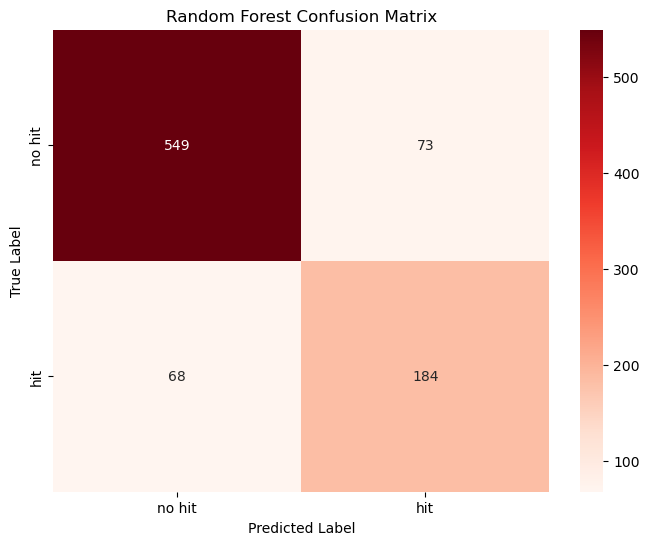

In [31]:
rf_model = RandomForestClassifier()

rf_model.fit(X_train_smote,y_train_smote)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

conf_mat_rf = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))

sns.heatmap(conf_mat_rf, annot=True, cmap='Reds', fmt='g', xticklabels=['no hit', 'hit'], yticklabels=['no hit', 'hit'])

plt.title('Random Forest Confusion Matrix')

plt.xlabel('Predicted Label')

plt.ylabel('True Label')

plt.show()

[LightGBM] [Info] Number of positive: 2487, number of negative: 2487
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000417 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3425
[LightGBM] [Info] Number of data points in the train set: 4974, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       622
           1       0.74      0.73      0.73       252

    accuracy                           0.85       874
   macro avg       0.82      0.81      0.81       874
weighted avg       0.85      0.85      0.85       874



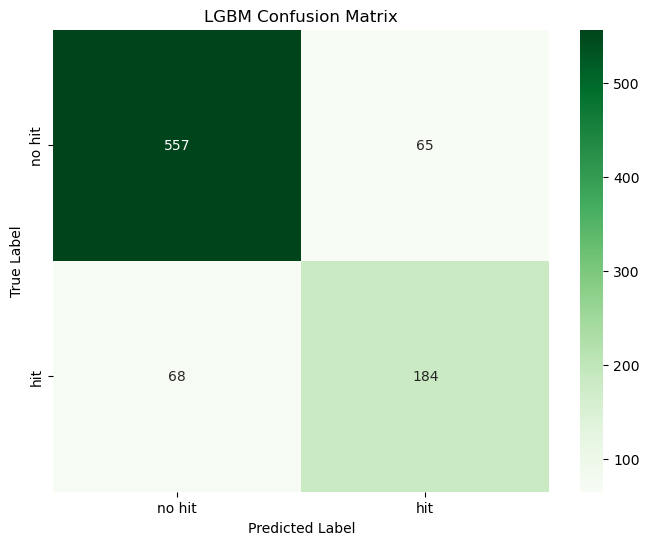

In [32]:
lgbm_model = LGBMClassifier()

lgbm_model.fit(X_train_smote, y_train_smote)

y_pred = lgbm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

conf_mat_lgbm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))

sns.heatmap(conf_mat_lgbm, annot=True, cmap='Greens', fmt='g', xticklabels=['no hit', 'hit'], yticklabels=['no hit', 'hit'])

plt.title('LGBM Confusion Matrix')

plt.xlabel('Predicted Label')

plt.ylabel('True Label')

plt.show()

In [33]:
lgbm_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

[LightGBM] [Info] Number of positive: 2487, number of negative: 2487
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000916 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3425
[LightGBM] [Info] Number of data points in the train set: 4974, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

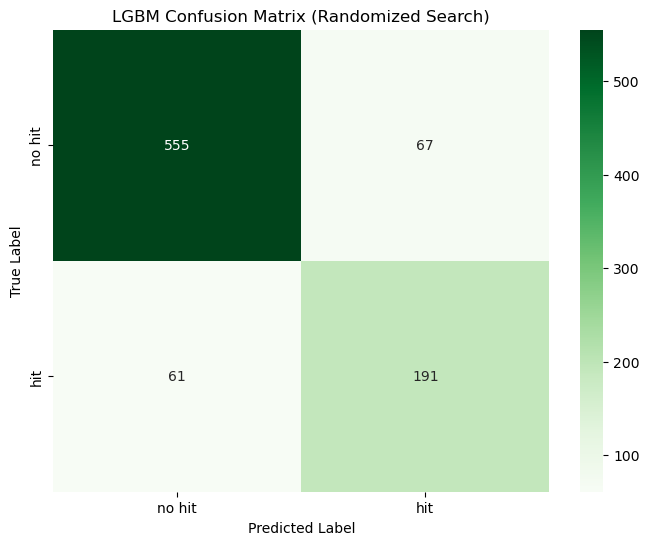

In [34]:
param_dist = {
    'n_estimators': [200, 250, 300],         
    'learning_rate': [0.03, 0.05, 0.1],     
    'max_depth': [7, 10, 12],               
    'num_leaves': [40, 50, 60],             
    'subsample': [0.7, 0.8, 1.0],           
    'colsample_bytree': [0.8, 0.9, 1.0],    
    'min_child_weight': [3, 5, 7],          
    'scale_pos_weight': [2, 3, 4],          
    'reg_alpha': [0.1, 1, 10],              
    'reg_lambda': [10, 50, 100]             
}



random_search = RandomizedSearchCV(
    estimator=lgbm_model,
    param_distributions=param_dist,
    n_iter=50,                
    scoring='accuracy',       
    cv=5,                     
    verbose=0,                
    random_state=42,
    n_jobs=-1                 
)


random_search.fit(X_train_smote, y_train_smote)


print("Best parameters:", random_search.best_params_)
print("Best cross-validation score:", random_search.best_score_)


best_lgbm_model = random_search.best_estimator_
y_pred = best_lgbm_model.predict(X_test)


print("Classification Report:")
print(classification_report(y_test, y_pred))


conf_mat_lgbm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat_lgbm, annot=True, cmap='Greens', fmt='g', xticklabels=['no hit', 'hit'], yticklabels=['no hit', 'hit'])
plt.title('LGBM Confusion Matrix (Randomized Search)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [35]:
feature_importance = pd.DataFrame({'Importance':best_lgbm_model.feature_importances_, 'Features':features})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance

,Importance,Features
11,1395,playlist_subgenre_encoded
12,1134,playlist_genre_encoded
9,897,valence
6,878,acousticness
0,864,danceability
8,860,liveness
10,849,tempo
5,816,speechiness
1,757,energy
2,754,key


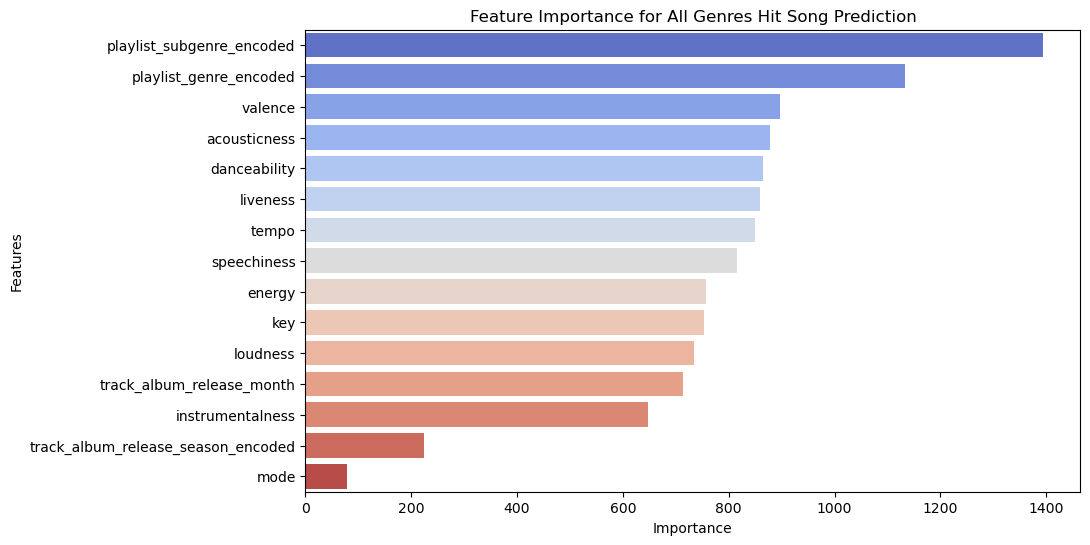

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Features', data=feature_importance, palette='coolwarm')
plt.title('Feature Importance for All Genres Hit Song Prediction')
plt.show()

Analyzing genre: pop
0.9310344827586207
Analyzing genre: rock
0.6785714285714286
Analyzing genre: hip-hop
0.6901408450704225
Analyzing genre: latin
0.6708860759493671
Analyzing genre: electronic
0.8648648648648649
Analyzing genre: lofi
0.9833333333333333


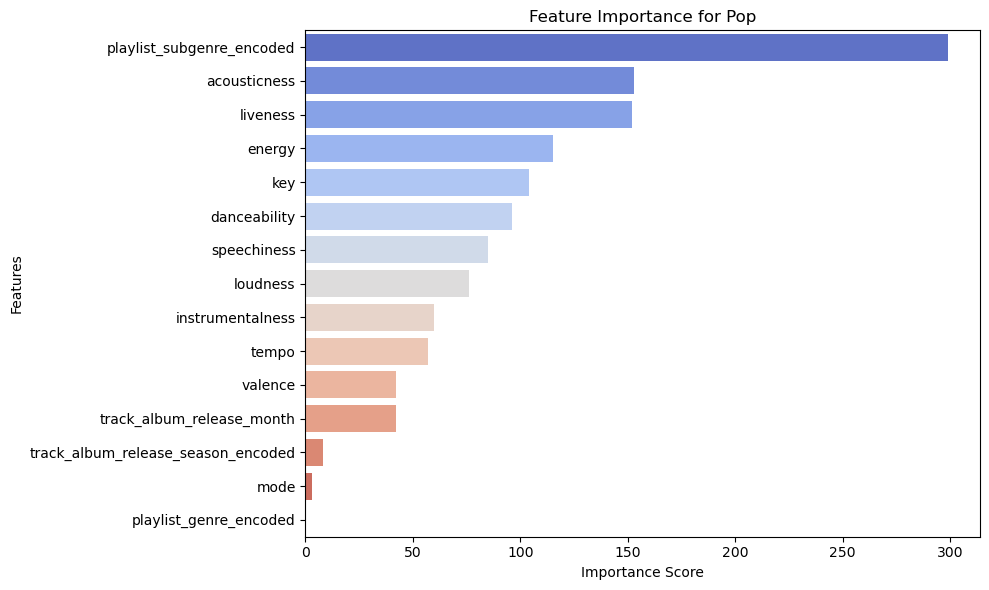

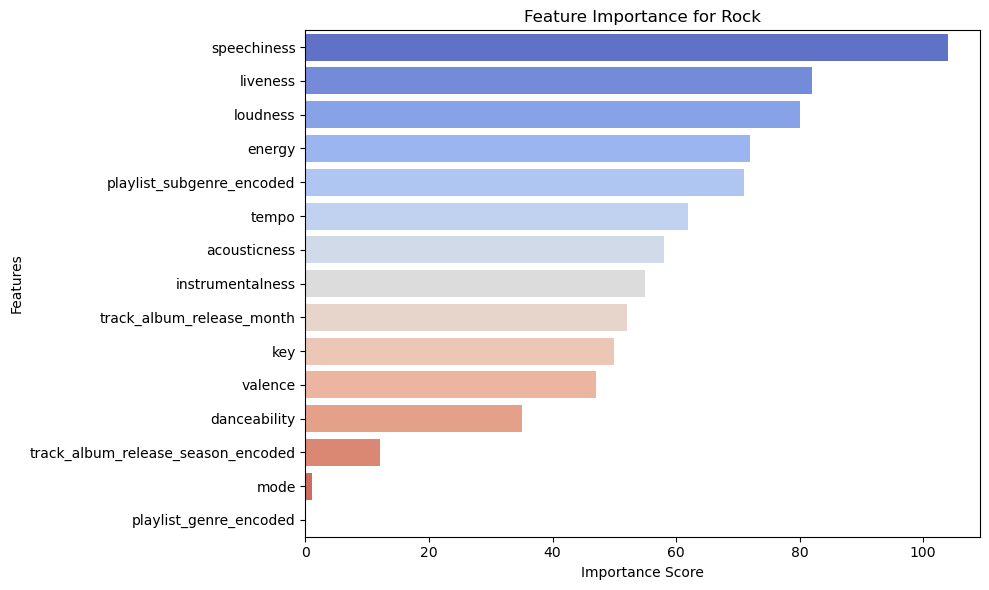

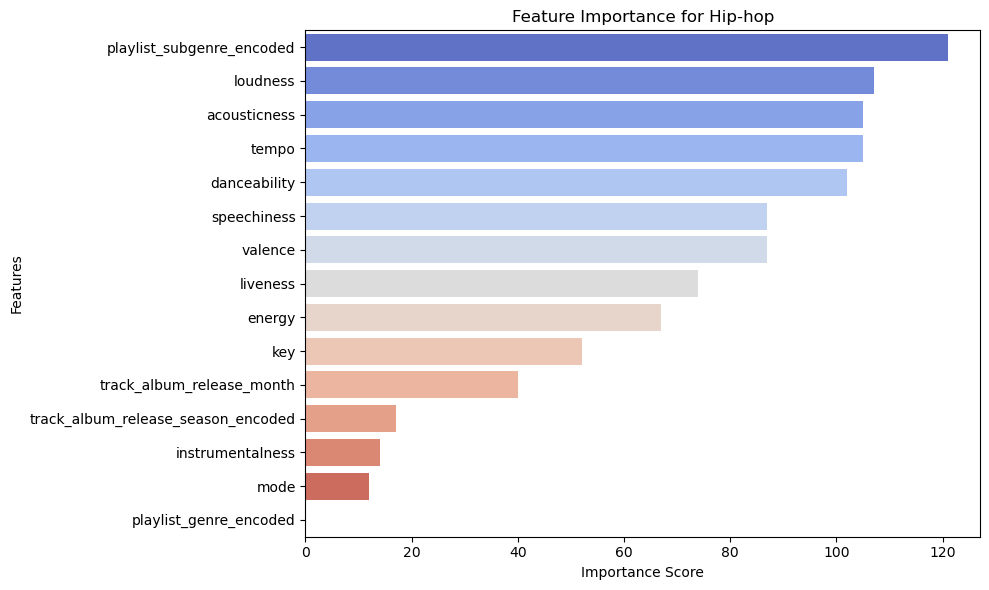

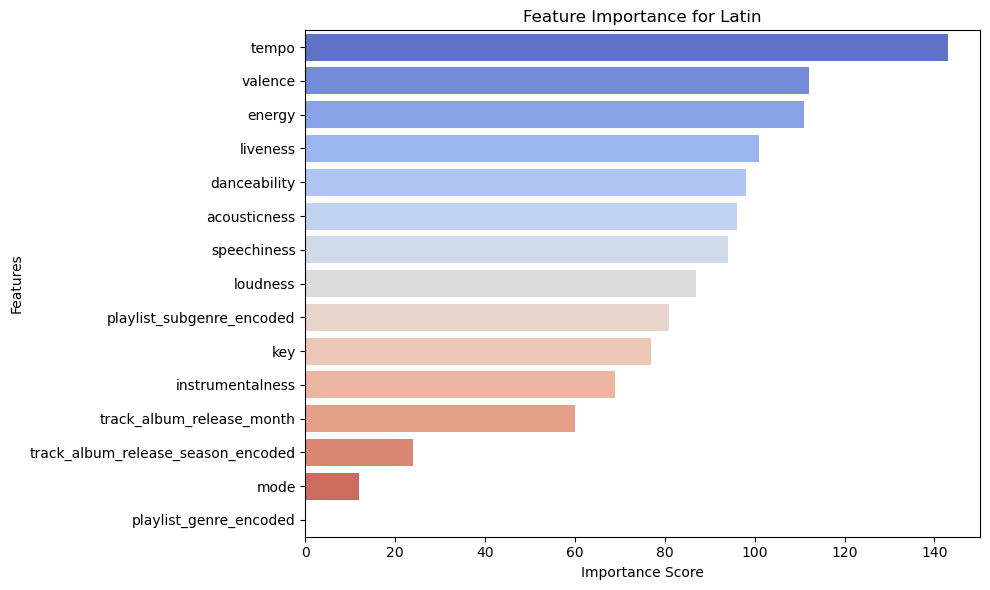

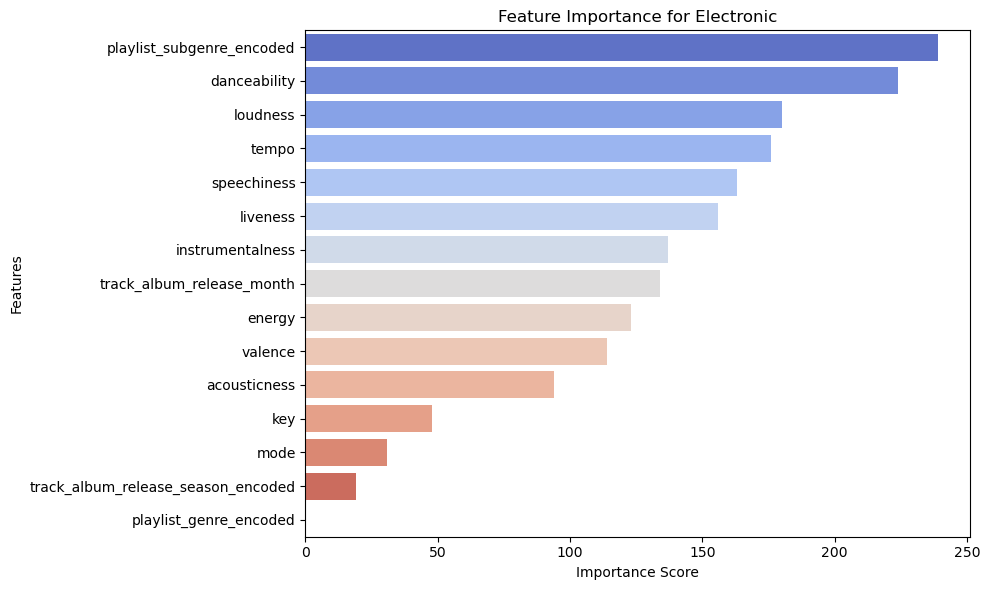

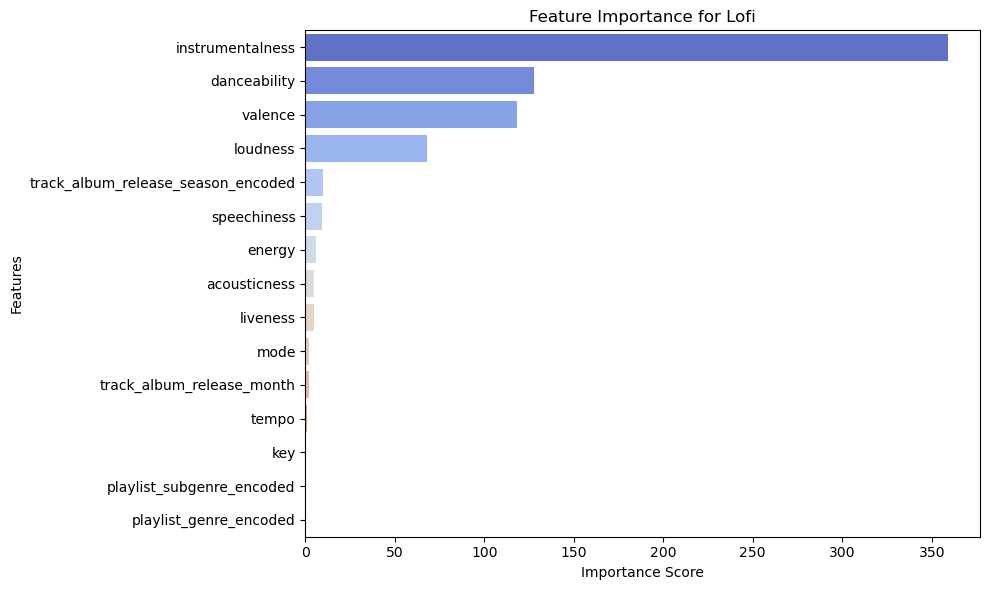

In [37]:
# Selected genres for analysis
selected_genres = ['pop', 'rock', 'hip-hop', 'latin', 'electronic', 'lofi']

genre_feature_importance = {}

for genre in selected_genres:
    print(f"Analyzing genre: {genre}")


    X = experiment_df[features]
    y = experiment_df['track_popularity_cat']
    
    genre_data = experiment_df[experiment_df['playlist_genre'] == genre]
    
    X = genre_data[features]
    y = genre_data['track_popularity_cat']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    
    genre_model = LGBMClassifier(random_state=42, verbosity=-1)
    genre_model.fit(X_train, y_train)

    print(genre_model.score(X_test, y_test))
    
    importance = genre_model.feature_importances_
    genre_feature_importance[genre] = pd.DataFrame({'Importance': importance, 'Features': features}).sort_values(by='Importance', ascending=False)

for genre, importance_df in genre_feature_importance.items():
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Features', data=importance_df, palette='coolwarm')
    plt.title(f'Feature Importance for {genre.capitalize()}')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()

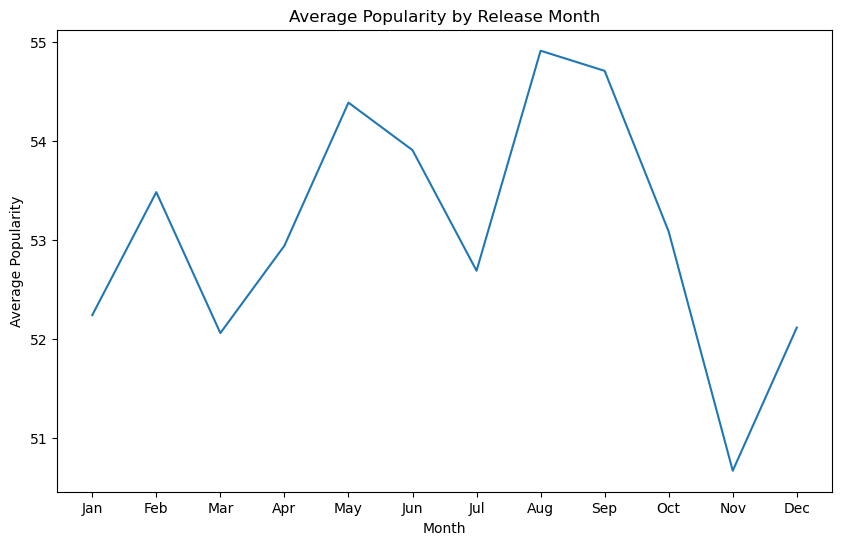

In [38]:
seasonal_df = experiment_df.groupby('track_album_release_month')['track_popularity'].mean().reset_index()
data=pd.DataFrame(seasonal_df)
plt.figure(figsize=(10, 6))
sns.lineplot(x='track_album_release_month', y='track_popularity', data=pd.DataFrame(seasonal_df))
plt.title('Average Popularity by Release Month')
plt.xlabel('Month')
plt.ylabel('Average Popularity')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.show()

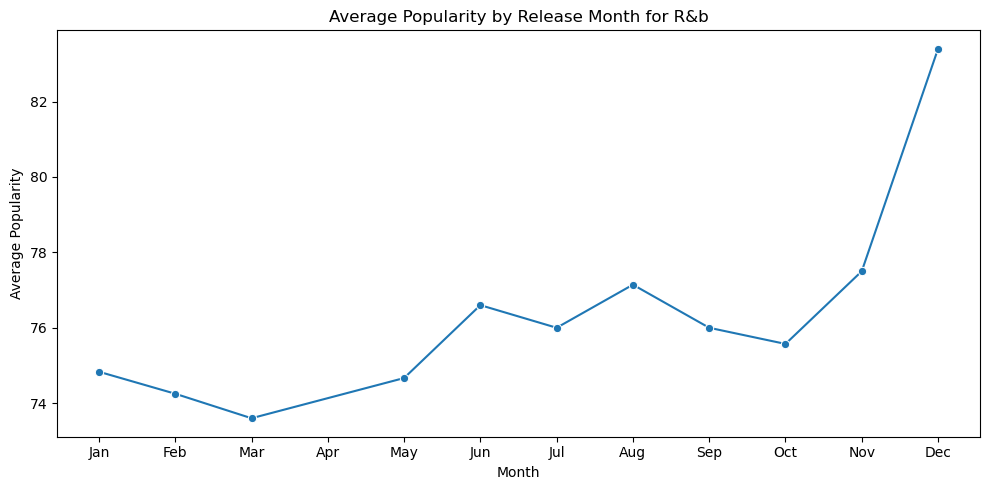

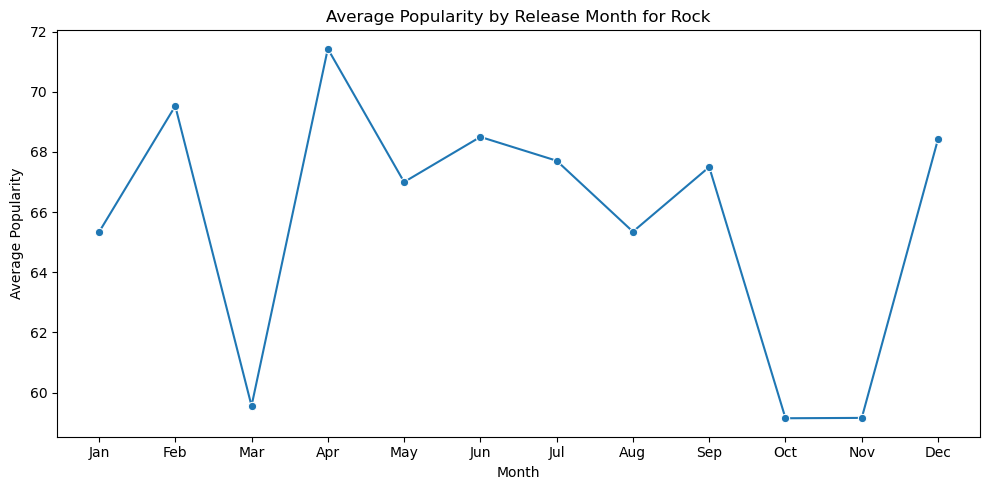

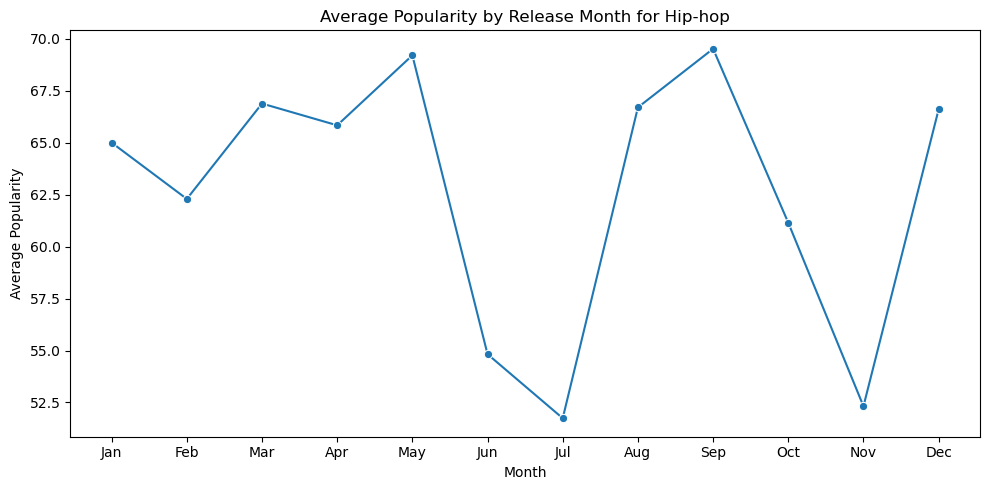

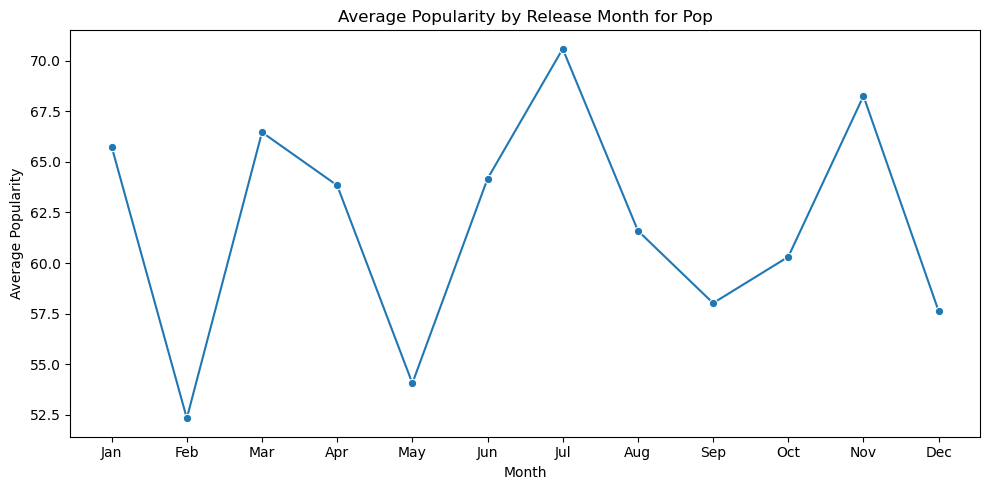

In [39]:
selected_genres = ['r&b','rock', 'hip-hop', 'pop']

for genre in selected_genres:
    genre_data = experiment_df[experiment_df['playlist_genre'] == genre]
    
    monthly_genre_popularity = genre_data.groupby('track_album_release_month')['track_popularity'].mean().reset_index()
    
    plt.figure(figsize=(10, 5))
    sns.lineplot(data=monthly_genre_popularity, x='track_album_release_month', y='track_popularity', marker='o')
    plt.title(f'Average Popularity by Release Month for {genre.capitalize()}')
    plt.xlabel('Month')
    plt.ylabel('Average Popularity')
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.tight_layout()
    plt.show()

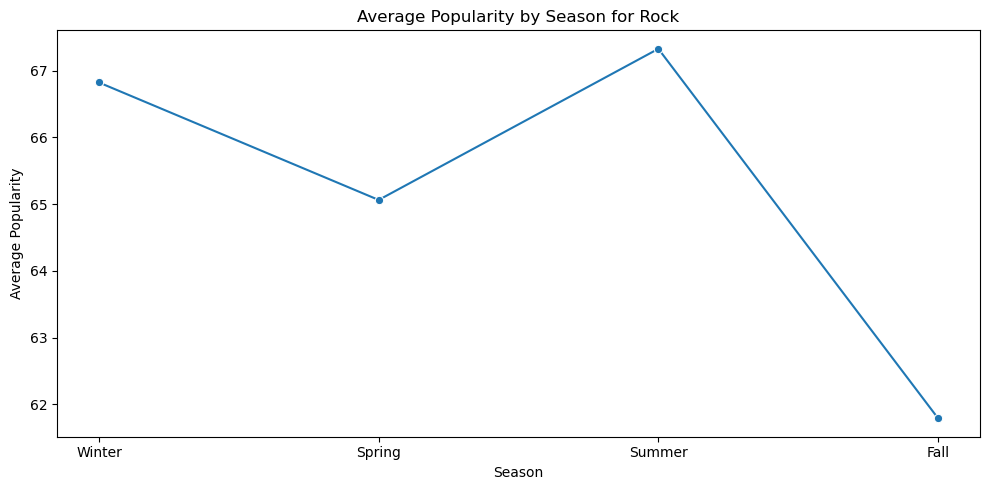

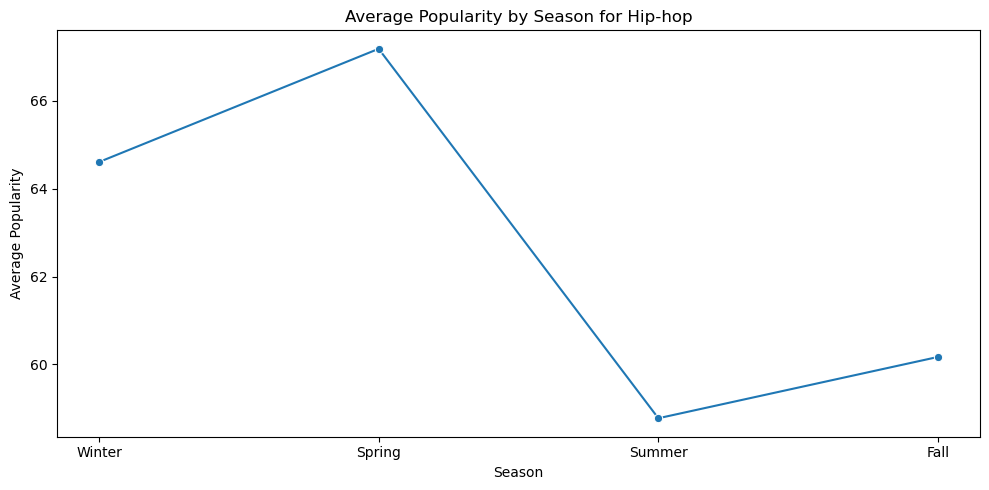

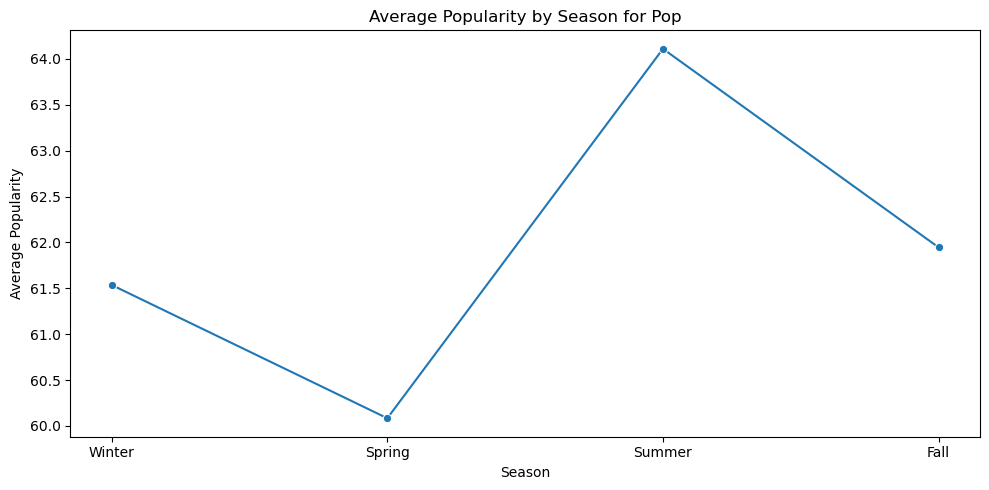

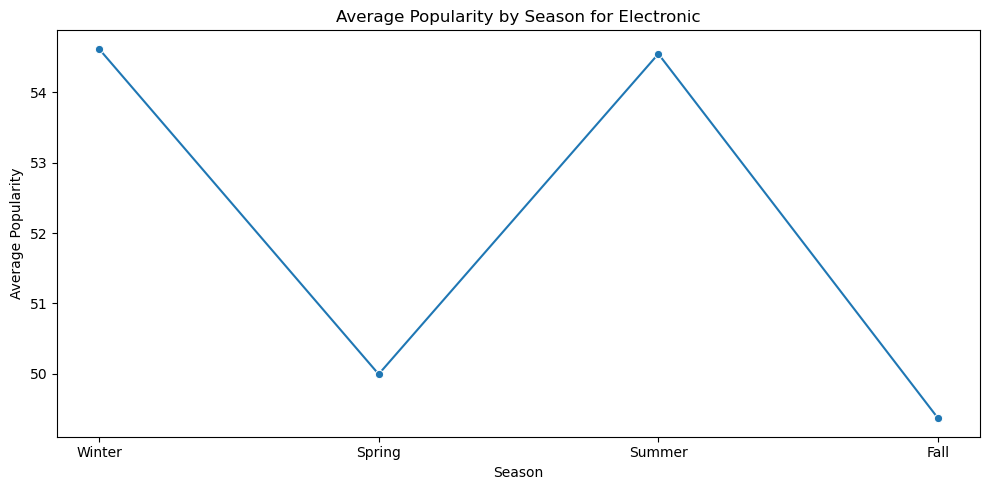

In [40]:
selected_genres = ['rock', 'hip-hop', 'pop', 'electronic']

season_mapping = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}

experiment_df['track_album_release_season'] = experiment_df['track_album_release_month'].map(season_mapping)

for genre in selected_genres:
    genre_data = experiment_df[experiment_df['playlist_genre'] == genre]
    
    seasonal_genre_popularity = genre_data.groupby('track_album_release_season')['track_popularity'].mean().reset_index()
    
    season_order = ['Winter', 'Spring', 'Summer', 'Fall']
    seasonal_genre_popularity['track_album_release_season'] = pd.Categorical(
        seasonal_genre_popularity['track_album_release_season'], categories=season_order, ordered=True
    )
    seasonal_genre_popularity = seasonal_genre_popularity.sort_values('track_album_release_season')

    plt.figure(figsize=(10, 5))
    sns.lineplot(data=seasonal_genre_popularity, x='track_album_release_season', y='track_popularity', marker='o')
    plt.title(f'Average Popularity by Season for {genre.capitalize()}')
    plt.xlabel('Season')
    plt.ylabel('Average Popularity')
    plt.tight_layout()
    plt.show()

In [41]:
high_popularity_data = experiment_df[experiment_df['track_popularity_cat'] == 1]
summary_stat = high_popularity_data[features].describe()

mode_values = summary_stat.mode().iloc[0]

print("\nMode Values for Features in High Popularity Class:")
print(mode_values)


Mode Values for Features in High Popularity Class:
danceability                           0.138000
energy                                 0.001610
key                                    0.000000
loudness                             -43.643000
mode                                   1.000000
speechiness                            0.023200
acousticness                           0.000013
instrumentalness                       0.000000
liveness                               0.021000
valence                                0.034800
tempo                                 27.096123
playlist_subgenre_encoded              0.000000
playlist_genre_encoded                 0.000000
track_album_release_season_encoded     0.000000
track_album_release_month              1.000000
Name: 0, dtype: float64


In [42]:
selected_genres = ['rock', 'pop', 'r&b', 'hip-hop']

high_popularity_data = experiment_df[experiment_df['track_popularity_cat'] == 1]

genre_mode_values = {}

for genre in selected_genres:
    genre_data = high_popularity_data[high_popularity_data['playlist_genre'] == genre]
    
    summary_stat = genre_data[features].describe()
    
    mode_df = genre_data[features].mode()
    
    mode_values = mode_df.iloc[0] 
    
    genre_mode_values[genre] = mode_values

for genre, mode_values in genre_mode_values.items():
    print(f"\nMode Values for Features in Genre {genre}:")
    print(mode_values)


Mode Values for Features in Genre rock:
danceability                           0.50200
energy                                 0.79500
key                                    0.00000
loudness                             -18.06400
mode                                   1.00000
speechiness                            0.02760
acousticness                           0.00178
instrumentalness                       0.00000
liveness                               0.10400
valence                                0.51800
tempo                                 74.98900
playlist_subgenre_encoded             22.00000
playlist_genre_encoded                29.00000
track_album_release_season_encoded     2.00000
track_album_release_month              1.00000
Name: 0, dtype: float64

Mode Values for Features in Genre pop:
danceability                            0.7290
energy                                  0.7110
key                                     1.0000
loudness                               -8.8240
mo

In [43]:
music_high_popularity = experiment_df[experiment_df['track_popularity_cat'] == 1]
mode_features = music_high_popularity[features].mode().iloc[0]

distances_to_mode = np.sqrt(((music_high_popularity[features] - mode_features) ** 2).sum(axis=1))

closest_tracks_to_mode_indices = distances_to_mode.argsort()[:20]
closest_tracks_to_mode = music_high_popularity.iloc[closest_tracks_to_mode_indices]

closest_tracks_info = closest_tracks_to_mode[['track_name', 'track_artist', 'track_popularity', 'playlist_genre']]
closest_tracks_info.columns = ['Track Name', 'Artist', 'Popularity', 'Genre']

print("Top 20 Tracks Closest to Mode Features:")
display(closest_tracks_info)

Top 20 Tracks Closest to Mode Features:


,Track Name,Artist,Popularity,Genre
281,PIÉNSALO,Junior H,84,latin
369,Always On Time,"Ja Rule, Ashanti",72,r&b
268,Kamikaze (feat. Victor Mendivil),"Natanael Cano, Uriel Gaxiola, Ganggy, Victor M...",72,latin
1106,Two Faced,Linkin Park,79,rock
366,No One,Alicia Keys,76,r&b
362,The Boy Is Mine,"Brandy, Monica",73,r&b
43,+57,"KAROL G, Feid, DFZM, Ovy On The Drums, J Balvi...",84,pop
372,U Remind Me,USHER,69,r&b
283,Soltera,Shakira,86,latin
385,Trust,Brent Faiyaz,75,r&b


In [44]:
def select_features(X):
    return X[features] 
feature_selector = FunctionTransformer(select_features)

In [45]:
final_model = Pipeline(steps=[
    ('date_pipeline', date_pipeline),
    ('encoding_pipeline', encoding_pipeline),
    ('feature_selector', feature_selector),
    ('model', best_lgbm_model)      
])
final_model

Pipeline(steps=[('date_pipeline',
                 Pipeline(steps=[('to_datetime',
                                  FunctionTransformer(func=<function convert_to_datetime at 0x00000213218B7060>)),
                                 ('extract_year_month',
                                  FunctionTransformer(func=<function extract_year_and_month at 0x00000213218B6E80>)),
                                 ('classify_seasons',
                                  FunctionTransformer(func=<function classify_seasons at 0x00000213218B6FC0>))])),
                ('encoding...
                                  FunctionTransformer(func=<function encode_album_release_season at 0x00000213218B4FE0>))])),
                ('feature_selector',
                 FunctionTransformer(func=<function select_features at 0x00000213248BE200>)),
                ('model',
                 LGBMClassifier(colsample_bytree=0.8, max_depth=10,
                                min_child_weight=3, n_estimators=300,
                                num_leaves=40, reg_alpha=0.1, reg_lambda=10,
                                scale_pos_weight=2, subsample=0.7))])

In [46]:
joblib.dump(final_model, 'spotify_model.pkl')

['spotify_model.pkl']